# TP : Étude des vibrations d’un système à deux degrés de liberté

## Objectifs

- Comprendre le comportement dynamique d’un système à deux degrés de liberté.
- Mettre en équation le système sous forme matricielle.
- Résoudre numériquement l’évolution temporelle avec Python et SciPy.
- Analyser les modes propres et la réponse dynamique.

## 1. Modèle du système

On considère un système mécanique constitué de deux masses $ m_1 $ et $ m_2 $, reliées entre elles et au sol par des ressorts de raideur  $k_1$, $k_2$ et $k_3$.

Schéma du système :


## 2. Équations du mouvement

L’application du principe fondamental de la dynamique donne le système :

\begin{cases}
m_1 \ddot{x}_1 + (k_1 + k_2) x_1 - k_2 x_2 = 0 \\
m_2 \ddot{x}_2 + (k_2 + k_3) x_2 - k_2 x_1 = 0
\end{cases}

Ce système s’écrit sous forme matricielle :

$$
M \ddot{X} + K X = 0
$$

avec

$$
M =
\begin{bmatrix}
m_1 & 0 \\
0 & m_2
\end{bmatrix}, \quad
K =
\begin{bmatrix}
k_1 + k_2 & -k_2 \\
-k_2 & k_2 + k_3
\end{bmatrix}
$$

et $ X = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} $.


## 3. Étude des modes propres

On cherche les pulsations propres ( $\omega ) en résolvant l’équation aux valeurs propres :

$$
\det(K - \omega^2 M) = 0
$$

### Travail demandé :

1. Lancer le script Python pour calculer les valeurs propres et les vecteurs propres du système en utilisant `numpy.linalg.eig`.
2. Interpréter physiquement les modes propres obtenus.


In [2]:
import numpy as np

# Paramètres du système
m1, m2 = 1.0, 1.0
k1, k2, k3 = 10.0, 20.0, 10.0

# Matrices de masse et de raideur
M = np.array([[m1, 0], [0, m2]])
K = np.array([[k1 + k2, -k2], [-k2, k2 + k3]])

# Calcul des valeurs propres et vecteurs propres
eigvals, eigvecs = np.linalg.eig(np.linalg.inv(M).dot(K))
frequences_propres = np.sqrt(eigvals)

print("Fréquences propres :", frequences_propres)
print("Modes propres :\n", eigvecs)

Fréquences propres : [7.07106781 3.16227766]
Modes propres :
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


## 4. Résolution numérique du mouvement libre

On résout numériquement le système sous forme d’un système d’équations différentielles du premier ordre.

### Formulation sous forme d’état :

En posant $ Y = \begin{bmatrix} X \\ \dot{X} \end{bmatrix} $, on réécrit le système sous la forme :

$$
\dot{Y} =
\begin{bmatrix}
0 & I \\
-M^{-1} K & 0
\end{bmatrix}
Y
$$

avec $\mathbf{I}$ la matrice identité.

On utilise la fonction `solve_ivp` de `scipy.integrate` pour résoudre numériquement le système.

### Travail demandé :

3. Implémenter la résolution du système avec `solve_ivp`.
4. Tracer les déplacements des masses en fonction du temps pour des conditions initiales données.
5. Analyser l’influence des paramètres du système sur la réponse temporelle.


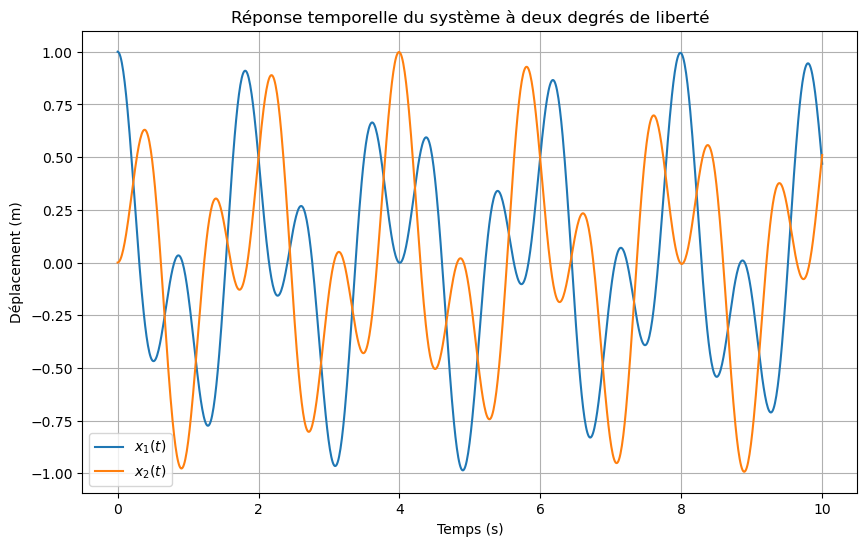

In [7]:
import scipy.integrate
import matplotlib.pyplot as plt

# Fonction définissant le système d'équations différentielles
#def system(t, Y):
#    X = Y[:2]
#    dX = Y[2:]
#    d2X = np.linalg.solve(M, -K @ X)
#    return np.concatenate((dX, d2X))

# Définition de la fonction représentant le système d'équations différentielles
def system(t, Y):
    x1, x2, x1_dot, x2_dot = Y
    x1_ddot = -(k1 + k2) / m1 * x1 + k2 / m1 * x2
    x2_ddot = k2 / m2 * x1 - (k2 + k3) / m2 * x2
    return [x1_dot, x2_dot, x1_ddot, x2_ddot]

# Conditions initiales : [x1(0), x2(0), x1_dot(0), x2_dot(0)]
Y0 = [1.0, 0.0, 0.0, 0.0]

# Plage de temps pour la simulation
t_span = (0, 10)
t_eval = np.linspace(0, 10, 1000)

# Résolution numérique
sol = scipy.integrate.solve_ivp(system, t_span, Y0, t_eval=t_eval)

# Extraction des solutions
x1 = sol.y[0]
x2 = sol.y[1]

# Tracé des résultats
plt.figure(figsize=(10, 6))
plt.plot(sol.t, x1, label='$x_1(t)$')
plt.plot(sol.t, x2, label='$x_2(t)$')
plt.xlabel('Temps (s)')
plt.ylabel('Déplacement (m)')
plt.title('Réponse temporelle du système à deux degrés de liberté')
plt.legend()
plt.grid(True)
plt.show()

### 4.3. Analyse des résultats

- **Observation des déplacements** : En observant les courbes de \( x_1(t) \) et \( x_2(t) \), décrivez le comportement des deux masses au cours du temps. Identifiez les phases de mouvement en phase et en opposition de phase.

- **Influence des paramètres** : Modifiez les valeurs des masses et des raideurs (\( m_1 \), \( m_2 \), \( k_1 \), \( k_2 \), \( k_3 \)) et observez l'impact sur la réponse du système. Notez particulièrement comment les fréquences naturelles et les amplitudes des oscillations sont affectées.

- **Conditions initiales** : Changez les conditions initiales \( Y0 \) pour étudier différentes configurations de départ (par exemple, en donnant une vitesse initiale aux masses) et analysez comment cela influence la dynamique du système.


## 6. Réponse forcée du système

Nous allons maintenant étudier la réponse du système lorsqu'il est soumis à une force externe harmonique. Considérons une force $F(t) = F_0 \cos(\omega t) $ appliquée à la masse $m_1$.

### 6.1. Équations du mouvement avec force externe

Les équations du mouvement deviennent :

$$
M \ddot{X} + K X = F(t)
$$

où $F(t)$ est le vecteur des forces externes appliquées au système.

### 6.2. Implémentation en Python

Nous allons modifier la fonction définissant le système d'équations différentielles pour inclure la force externe, puis résoudre le système pour différentes fréquences d'excitation $\omega$.


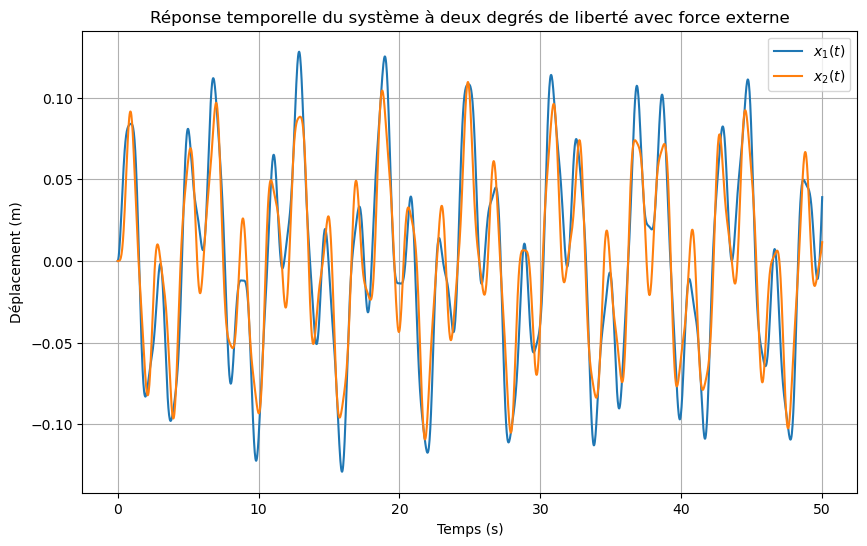

In [19]:
# Paramètres de la force externe
F0 = 1.0  # Amplitude de la force (N)
omega = 1.0  # Fréquence de la force (rad/s)

def system_forced(t, Y):
    x1, x2, x1_dot, x2_dot = Y
    # Force externe appliquée à m1
    F_ext = F0 * np.cos(omega * t)
    # Équations du mouvement avec force externe
    x1_ddot = -(k1 + k2) / m1 * x1 + k2 / m1 * x2 + F_ext / m1
    x2_ddot = k2 / m2 * x1 - (k2 + k3) / m2 * x2
    return [x1_dot, x2_dot, x1_ddot, x2_ddot]

# Conditions initiales
Y0 = [0.0, 0.0, 0.0, 0.0]  # [x1(0), x2(0), x1_dot(0), x2_dot(0)]

# Plage de temps pour la simulation
t_span = (0, 50)  # De 0 à 50 secondes
t_eval = np.linspace(t_span[0], t_span[1], 2000)  # Points de temps pour l'évaluation

# Résolution du système
sol_forced = scipy.integrate.solve_ivp(system_forced, t_span, Y0, t_eval=t_eval)

# Extraction des solutions
x1_forced = sol_forced.y[0]
x2_forced = sol_forced.y[1]

# Tracé des résultats
plt.figure(figsize=(10, 6))
plt.plot(sol_forced.t, x1_forced, label='$x_1(t)$')
plt.plot(sol_forced.t, x2_forced, label='$x_2(t)$')
plt.xlabel('Temps (s)')
plt.ylabel('Déplacement (m)')
plt.title('Réponse temporelle du système à deux degrés de liberté avec force externe')
plt.legend()
plt.grid(True)
plt.show()


### 6.3. Analyse de la réponse forcée

- **Résonance** : En faisant varier la fréquence d'excitation $ \omega $, observez les conditions pour lesquelles le système entre en résonance. Comparez ces fréquences aux fréquences propres calculées précédemment.

- **Amplitude de la réponse** : Analysez comment l'amplitude de la réponse du système change en fonction de la fréquence d'excitation. Tracez la courbe d'amplitude en fonction de $ \omega $ pour visualiser le phénomène de résonance.

- **Écriture matricielle** : Déterminez comment réecrire le système ci-dessus en système martriciel pour ensuite pourvoir inteegrer le signal temportel.

- **Effet de l'amortissement** : Introduisez un amortissement dans le système en ajoutant des termes proportionnels aux vitesses $( c_1 \dot{x}_1 $ et $ c_2 \dot{x}_2 )$ dans les équations du mouvement. Étudiez l'effet de l'amortissement sur la réponse en fréquence du système.


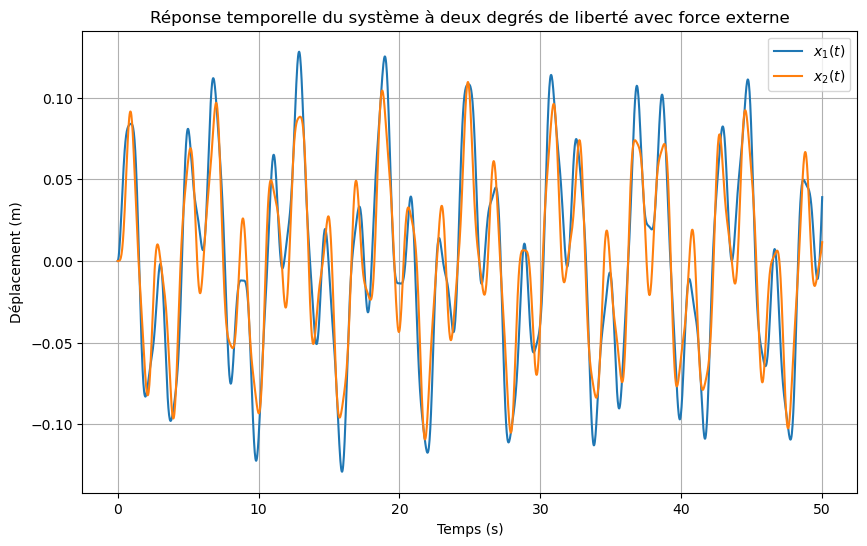

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Paramètres du système
m1, m2 = 1.0, 1.0
k1, k2, k3 = 10.0, 20.0, 10.0
c1, c2 = 0.0, 0.0

# Matrices du système
M = np.array([[m1, 0], [0, m2]])
C = np.array([[c1, -c1], [-c1, c2]])
K = np.array([[k1 + k2, -k2], [-k2, k2 + k3]])

# Paramètres de la force externe
F0 = 1.0  # Amplitude de la force (N)
omega = 1.0  # Fréquence de la force (rad/s)

def system_forced(t, Y):
    """
    Système sous forme matricielle avec force externe appliquée à m1.
    """
    X = np.array([Y[0], Y[1]])  # Déplacements x1, x2
    X_dot = np.array([Y[2], Y[3]])  # Vitesses x1_dot, x2_dot
    
    # Force externe appliquée sur m1 uniquement
    F_ext = np.array([F0 * np.cos(omega * t), 0])  

    # Résolution de l'équation du mouvement M * X_ddot = -C * X_dot - K * X + F_ext
    X_ddot = np.linalg.solve(M, -np.dot(C, X_dot) - np.dot(K, X) + F_ext)

    return [X_dot[0], X_dot[1], X_ddot[0], X_ddot[1]]

# Conditions initiales
Y0 = [0.0, 0.0, 0.0, 0.0]  # [x1(0), x2(0), x1_dot(0), x2_dot(0)]

# Plage de temps pour la simulation
t_span = (0, 50)  # De 0 à 50 secondes
t_eval = np.linspace(t_span[0], t_span[1], 2000)  # Points de temps pour l'évaluation

# Résolution du système
sol_forced = solve_ivp(system_forced, t_span, Y0, t_eval=t_eval)

# Extraction des solutions
x1_forced = sol_forced.y[0]
x2_forced = sol_forced.y[1]

# Tracé des résultats
plt.figure(figsize=(10, 6))
plt.plot(sol_forced.t, x1_forced, label='$x_1(t)$')
plt.plot(sol_forced.t, x2_forced, label='$x_2(t)$')
plt.xlabel('Temps (s)')
plt.ylabel('Déplacement (m)')
plt.title('Réponse temporelle du système à deux degrés de liberté avec force externe')
plt.legend()
plt.grid(True)
plt.show()

## 7. Conclusion

Dans ce TP, nous avons :

- Modélisé un système mécanique à deux degrés de liberté.
- Formulé les équations du mouvement et résolu numériquement la réponse temporelle du système.
- Analysé les modes propres et les fréquences naturelles.
- Étudié la réponse du système à une excitation externe harmonique et exploré le phénomène de résonance.

Ces analyses permettent de mieux comprendre le comportement dynamique des systèmes mécaniques complexes et l'importance des paramètres tels que les masses, les raideurs, et l'amortissement sur la réponse du système.
